In [1]:
# This line will make sure that results are replicable

from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf

print("libraries all imported, ready to go")

libraries all imported, ready to go


In [3]:
filename = 'processed_data.pkl'
feature = 'class_1'

In [4]:
pickle_in = open(filename,"rb")
df = pickle.load(pickle_in)

In [5]:
df = df.drop('CompanyNumber', axis=1)

In [6]:
df.head()

,MortgagesNumMortCharges,MortgagesNumMortOutstanding,MortgagesNumMortPartSatisfied,SIC1,eCompanyCategory,eAccountsAccountCategory,namechanged,namechanged2,class_1,dAccountsOutstandingTime,dReturnsOutstandingTime,OperatingTime
0,0,0,0,99.0,15,3,0,0,False,0.0,1.467655,6.303720
1,0,0,0,62.0,15,10,0,0,False,0.0,0.000000,1.301370
2,0,0,0,70.0,15,13,0,0,False,0.0,0.482192,6.317382
3,0,0,0,58.0,15,9,0,0,False,0.0,1.505906,4.583562
4,1,1,0,70.0,15,12,1,0,False,0.0,0.591781,7.668493


In [7]:
y = df[feature].values
y.shape

(3584436,)

In [8]:
X = df.drop(feature, axis=1).values
X.shape

(3584436, 11)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [15]:
# Describe the architecture of the model, except for the input layer.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
])


# set some additional settings
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=2, 
                    batch_size=512,
                    verbose=0)

In [35]:
loss, acc = model.evaluate(X_test, y_test)
print('Loss: {:0.3f}, Accuracy: {:0.3f}'.format(loss, acc) )

Loss: 0.296, Accuracy: 0.903


In [19]:
y_pred = model.predict(X_test)

In [20]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)

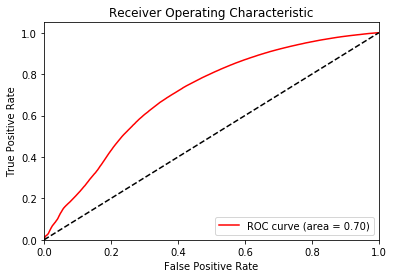

In [21]:
plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()